In [2]:
from matplotlib import pyplot as plt
from matplotlib import lines
import matplotlib
import numpy as np

plt.style.use('ggplot')

# Databases

In [3]:
def adjust_lightness(color, amount=0.5):
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], max(0, min(1, amount * c[1])), c[2])


def build_paradigm(data):
#     ax = plt.subplot(111)
#     ax = fig.add_subplot(axes_class=AxesZero)

    ax = plt.gca()
    
#     ax = plt.axes(frameon=False)
    ax.set_frame_on(False)
    ax.get_xaxis().tick_bottom()
    ax.axes.get_yaxis().set_visible(False)

    Y = 1
    ticks = []
    ticks_label = []
    extra = []
    alpha = 1


    max_y = 0
    min_y = 0
    for i, frame  in  enumerate(data):
        
        p = frame['time']
        alpha = frame.get('alpha', 1)
        label = frame['label']
        label_extra = frame.get('label_extra', None)
        color = frame.get('color', f'C{i}')
        
        rotation = frame.get('rotation', 0)
        fontsize = frame.get('fontsize', 14)
        
        level = frame.get('level', (0, 1))
        level = [0.1+l for l in level]
        max_y = max(max_y, *level)  
        min_y = min(min_y, *level)  
        
        
        restart = frame.get('restart', False)
        
        
        if restart:
            ticks_label.extend([i-p[0] for i in p]) 
            p = [i+ticks[-1] for i in p]
        else:
            ticks_label.extend(p)
        
        ticks.extend(p)
            

        plt.fill_between([p[0], p[-1]], *level, facecolor=color, alpha=alpha, linewidth=0, edgecolor=color)
        
        if hatch := frame.get('hatch', ''):
            plt.fill_between([p[0], p[-1]], *level, edgecolor=adjust_lightness(color, 0.85), facecolor='none', alpha=1, hatch=hatch, linewidth=0)
                
        
        if len(p) > 2:
            plt.fill_between(p[1:], *level, edgecolor=adjust_lightness(color, 0.85), facecolor='none', alpha=1, hatch='///', linewidth=0)
            if label_extra is None:
#                 label_extra = f'{1000*(p[2]-p[1]):.0f} ms'
                label_extra = f"\n{abs(p[1] - p[0]):.1f}s ~ {abs(p[-1]- p[0]):.1f}s"
#             if label_extra != '':    
#                 plt.annotate(label_extra, (np.mean(p[1:]), np.mean(level)), ha='center', va='center', color='w', fontsize=fontsize, rotation=rotation)
            elif label_extra:
                label_extra = f"\n{label_extra}"
        else:
            label_extra = ''
            
#         if frame.get('ha', 'center') == 'center':
#             x_ = np.mean(p)
#         else:
#             x_ = np.min(p)+0.1

        if marker := frame.get('marker', False):
            
            lev = [1+(0.2*marker['level']), 1.2+(0.2*marker['level'])]
#             q = p[:]
            
            max_y = max(max_y, *lev)  
            lev = [0.1+l for l in lev]
        
        
            q = p[0]
            extra.append(q+marker['width'])
            plt.fill_between([q, q+marker['width']], *lev, facecolor=color, alpha=alpha, linewidth=0, edgecolor=color)
            plt.fill_between([q, q+marker['width']], *lev, edgecolor=adjust_lightness(color, 0.85), facecolor='none', alpha=1, hatch='...', linewidth=0)
            plt.annotate(marker['label'], (np.mean([q, q+marker['width']]), np.mean(lev)), ha='center', va='center', color='w', fontsize=12, zorder=999)
            plt.vlines(q, marker.get('min', 0.1), lev[1], linestyle='--', linewidth=1, color='k', zorder=99)        
        
            
            if marker.get('label_end', False):
                q = p[-1]
                extra.append(q+marker['width'])
                plt.fill_between([q, q+marker['width']], *lev, facecolor=color, alpha=alpha, linewidth=0, edgecolor=color)
                plt.fill_between([q, q+marker['width']], *lev, edgecolor=adjust_lightness(color, 0.85), facecolor='none', alpha=1, hatch='...', linewidth=0)
                plt.annotate(marker['label_end'], (np.mean([q, q+marker['width']]), np.mean(lev)), ha='center', va='center', color='w', fontsize=12, zorder=999)
                plt.vlines(q, 0.1, lev[1], linestyle='--', linewidth=1, color='k', zorder=99)
            
            

    
        a, b = 0, 0
#         if rotation == 90:
#             a = -0.05
#             if label_extra:
#                 a -= 1
#         else:
#             b = 0.05
#             if label_extra:
#                 b -= 0.05
    
        plt.annotate(f"{label}{label_extra}", (np.mean([p[0], p[-1]])-a, np.mean(level)-b), ha=frame.get('ha', 'center'), va='center', color='w', fontsize=fontsize, rotation=rotation)

        
    
    xmin, xmax = min(ticks), max(ticks+extra)
    
    plt.xticks([])
    ax.set_xticklabels([])
#     plt.xticks(list(ticks))
#     ax.set_xticklabels([f"{i:.1f}s" for i in list(ticks_label)])
    ax.add_artist(lines.Line2D((xmin, xmax), (0, 0), color='black', linewidth=2))
    
    plt.xlabel('Time')
    
    plt.xlim(xmin, xmax)
    
    plt.ylim(min_y, max_y+0.1)

    
    ax.arrow(0, 0, xmax, 0, fc='k', ec='none',
             head_width=max_y * 0.07, head_length=max_y * 0.07,
             length_includes_head= False,
             clip_on = False) 
    

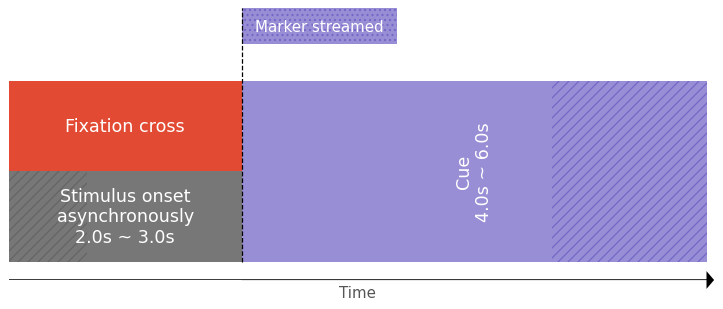

In [4]:
# from matplotlib import pyplot as plt
# from bci_framework.utils import build_paradigm
fig = plt.figure(figsize=(10, 4), dpi=90)

paradigm = (
    {
        'time': (-3, 0),
        'level': (0.5, 1),        
        'label': 'Fixation cross',
        'color': 'C0',
    },
    
    {
        'time': (0, -2, -3),
        'level': (0, 0.5),    
        'label': 'Stimulus onset\nasynchronously',
        'color': 'C3',
#         'rotation': 90,
    },       
  
    
    {
        'time': (0, 4, 6),
#         'level': (1, 1.5),
        'label': 'Cue',
        'color': 'C2',
        'rotation': 90,
        
        'marker': {
            'label': 'Marker streamed',
            'width': 2,
            'level': 1,
        }
        
    },
    
)


build_paradigm(paradigm)

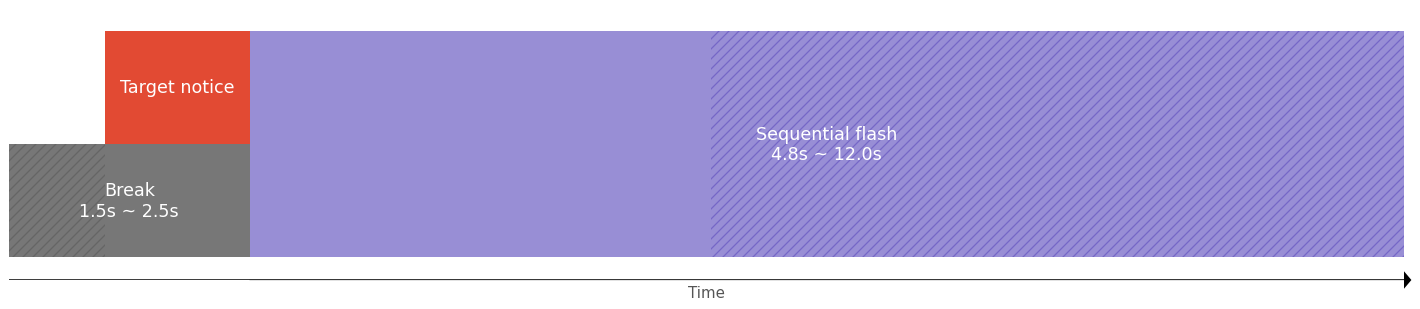

In [140]:
from matplotlib import pyplot as plt
# from bci_framework.utils import build_paradigm
fig = plt.figure(figsize=(20, 4), dpi=90)

paradigm = [
    {
        'time': (-1.5, 0),  
        'level': (0.5, 1), 
        'label': 'Target notice',
        'color': 'C0',
    },
    
    
    {
        'time': (0, -1.5, -2.5),
        'level': (0, 0.5), 
        'label': 'Break',
        'color': 'C3',
#         'rotation': 90,
    },   
    
    {
        'time': (0, 0.4*12, 12),
        'label': 'Sequential flash',
        'color': 'C2',
    },
 

]

build_paradigm(paradigm)


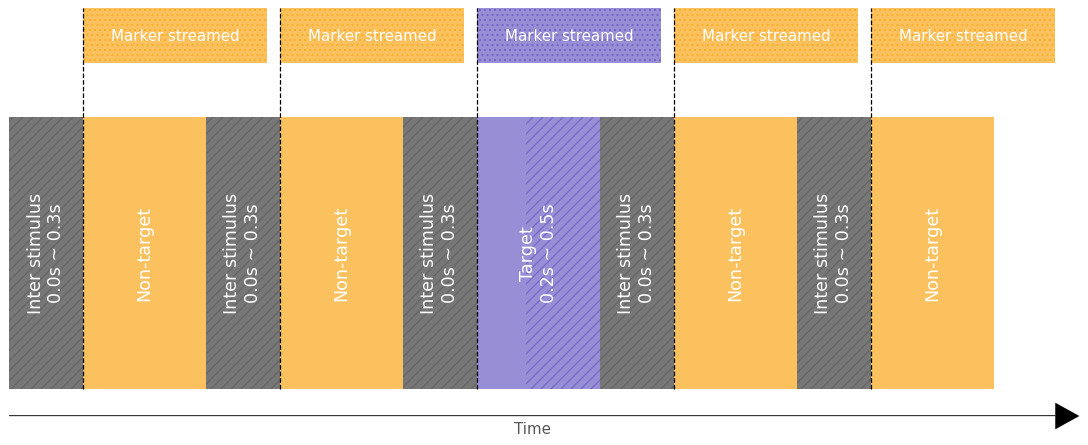

In [195]:
fig = plt.figure(figsize=(15, 6), dpi=90)

N = 5

paradigm_flash = []
for i in range(N):
    
#     T = (i-1)*1 + 1.5
    T = (i-1)*0.8 + 1.1
    
    stimulus = [
        {
        'time': (-0.3+T, -0.3+T, 0+T),
        'label': 'Inter stimulus',
        'color': 'C3',
        'rotation': 90,
#         'alpha': 0.2,
        },
        {
        'time': (0+T, 0.5+T),
        'label': 'Non-target',
        'color': 'C4',
        'rotation': 90,
#         'alpha': 0.2,        
            
        'marker': {
            'label': 'Marker streamed',
            'width': 0.75,
            'level': 1,
        }
        },
             
        
    
    ]
    
    
    if i == N//2:
        
        stimulus[0]['time'] = (-0.3+T, -0.3+T, 0+T)
#         stimulus[0]['label'] = 'Inter stimulus'
        stimulus[0]['color'] = 'C3'
#         stimulus[0]['alpha'] = 1
        
        stimulus[1]['time'] = (0+T, 0.2+T, 0.5+T)
        stimulus[1]['label'] = 'Target'
        stimulus[1]['color'] = 'C2'
#         stimulus[1]['alpha'] = 1
        
 

    paradigm_flash.extend(stimulus)

    
build_paradigm(paradigm_flash)

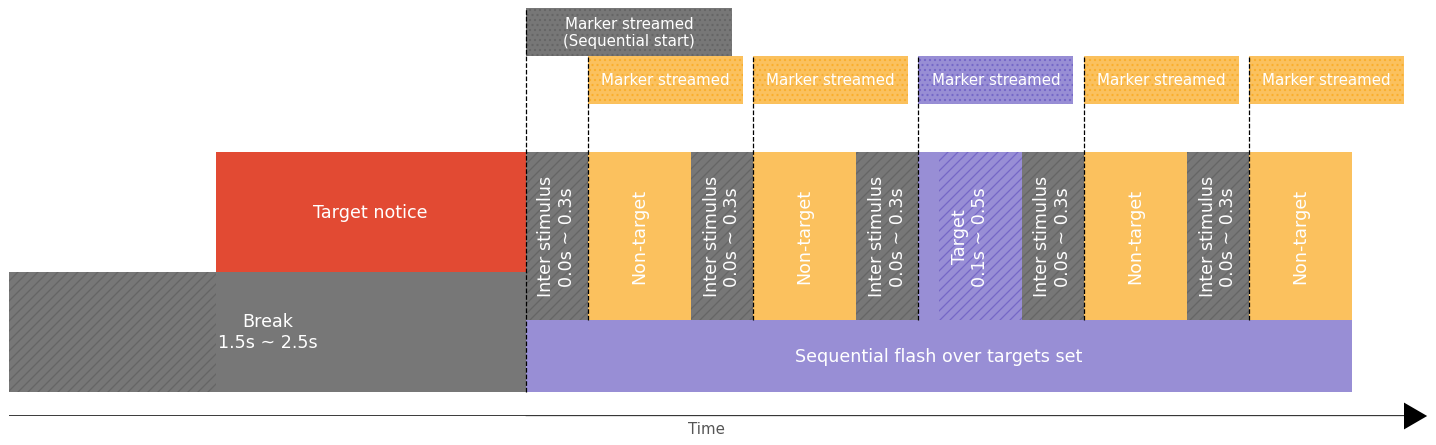

In [192]:
from matplotlib import pyplot as plt
# from bci_framework.utils import build_paradigm
fig = plt.figure(figsize=(20, 6), dpi=90)




paradigm = [
    {
        'time': (-1.5, 0),  
        'level': (0.5, 1), 
        'label': 'Target notice',
        'color': 'C0',
    },
    
    
    {
        'time': (0, -1.5, -2.5),
        'level': (0, 0.5), 
        'label': 'Break',
        'color': 'C3',
#         'rotation': 90,
    },   

#     {
#         'time': (0, 0.4*12, 12),
#         'label': 'Secuencial flash',
#         'color': 'C2',
#     },    
    

    {
        'time': (0, 4),
        'level': (0, 0.3), 
        'label': 'Sequential flash over targets set',
        'color': 'C2',
    },    
    
    
]


N = 5

paradigm_flash = []
for i in range(N):
    
    T = (i-1)*0.8 + 1.1
    
    stimulus = [
        {
        'time': (-0.3+T, -0.3+T, 0+T),
        'level': (0.3, 1),   
        'label': 'Inter stimulus',
        'color': 'C3',
        'rotation': 90,
#         'alpha': 0.2,
        },
        {
        'time': (0+T, 0.5+T),
        'level': (0.3, 1),   
        'label': 'Non-target',
        'color': 'C4',
        'rotation': 90,
#         'alpha': 0.2,        
            
        'marker': {
            'label': 'Marker streamed',
            'width': 0.75,
            'level': 1,
            'min': 0.4,
        }
        },
             
        
    
    ]
    
    
    if i == N//2:
        
        stimulus[0]['time'] = (-0.3+T, -0.3+T, 0+T)
#         stimulus[0]['label'] = 'Inter stimulus'
        stimulus[0]['color'] = 'C3'
#         stimulus[0]['alpha'] = 1
        
        stimulus[1]['time'] = (0+T, 0.1+T, 0.5+T)
        stimulus[1]['label'] = 'Target'
        stimulus[1]['color'] = 'C2'
#         stimulus[1]['alpha'] = 1


    if i == 0:
        stimulus[0]['marker']={
            'label': 'Marker streamed\n(Sequential start)',
            'width': 1,
            'level': 2,
        }
        
 

    paradigm_flash.extend(stimulus)


    
paradigm_flash.extend([
    
    

#         {
#         'time': (0, 0.2),
#         'level': (1, 2),
#         'label': 'Marker streamed',
#         'color': 'C2',
#         'rotation': 90,
#         'fontsize': 12,
#         'hatch': '...',
#     },  
    
])




build_paradigm(paradigm + paradigm_flash)


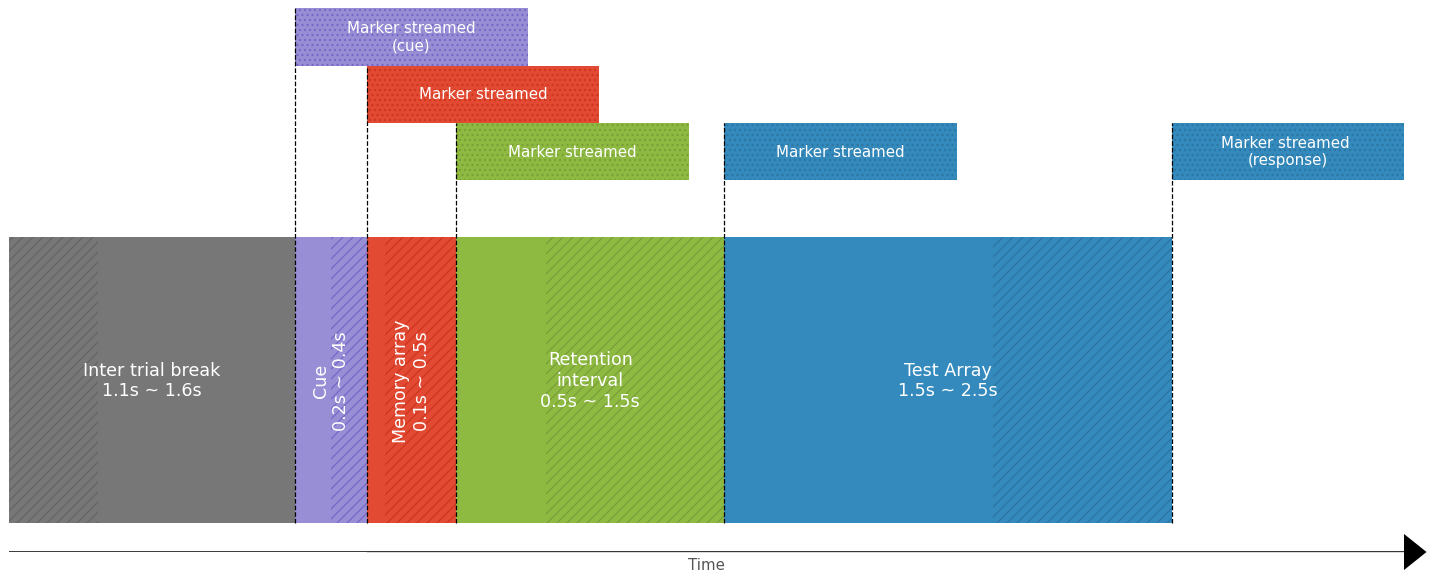

In [201]:
fig = plt.figure(figsize=(20, 8), dpi=90)

paradigm = (
    
    {
        'time': (-0.4, -1.5, -2),
        'label': 'Inter trial break',
        'color': 'C3',
#         'rotation': 90,
    },
    
    {
        'time': (-0.4, -0.2, 0),
#         'level': (1, 1.5),        
        'label': 'Cue',
        'color': 'C2',
        'rotation': 90,
        
        'marker': {
            'label': 'Marker streamed\n(cue)',
            'width': 1.3,
            'level': 3,
        }
        
    },
    
    
    
    {
        'time': (0, 0.1, 0.5),
        'label': 'Memory array',
        'color': 'C0',
        'rotation': 90,        
        'marker': {
            'label': 'Marker streamed',
            'width': 1.3,
            'level': 2,
        }
    },
    

    
    {
        'time': (0, 0.5, 1.5),
        'label': 'Retention\ninterval',
        'color': 'C5',
        'restart': True,       
        'marker': {
            'label': 'Marker streamed',
            'width': 1.3,
            'level': 1,
        }
    },
    {
        'time': (0, 1.5, 2.5),
        'label': 'Test Array',
        'color': 'C1',
        'restart': True,       
        'marker': {
            'label': 'Marker streamed',
            'label_end': 'Marker streamed \n(response)',
            'width': 1.3,
            'level': 1,
        }
    },

    



)


build_paradigm(paradigm)